<a href="https://colab.research.google.com/github/andy9806/MachineLearning_23/blob/main/andy9806/0320_2(logisticregression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# pandas 소수점 둘째자리 까지만
pd.options.display.float_format = '{:.2f}'.format

In [7]:
train = pd.read_csv("https://github.com/BigData23th/Data/raw/main/titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [9]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


<Axes: >

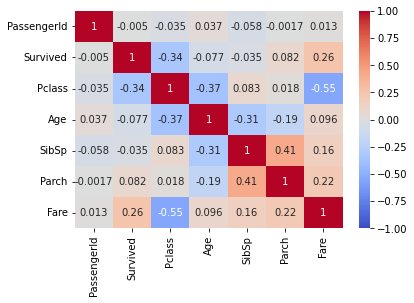

In [12]:
sns.heatmap(train.corr(),cmap='coolwarm',annot=True,vmin=-1,vmax=1)

In [16]:
train.set_index('PassengerId',inplace=True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [17]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<Axes: >

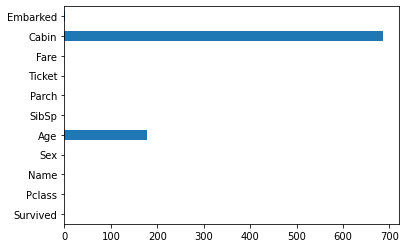

In [19]:
train.isnull().sum().plot(kind='barh')

In [20]:
train.isnull().sum()/len(train)

Survived   0.00
Pclass     0.00
Name       0.00
Sex        0.00
Age        0.20
SibSp      0.00
Parch      0.00
Ticket     0.00
Fare       0.00
Cabin      0.77
Embarked   0.00
dtype: float64

In [21]:
train.Embarked = train.Embarked.fillna('S')

In [22]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [23]:
train.drop(columns='Cabin',inplace=True)

In [28]:
train.Name.str.extract('.\s*([A-Za-z]+)\.')
#  * 0개 이상
#  + 1개 이상
#  . 0~1개
#  \s 공백
#  \S 공백이 아닌 문자

,0
PassengerId,
1,Mr
2,Mrs
3,Miss
4,Mrs
5,Mr
...,...
887,Rev
888,Miss
889,Miss


In [31]:
train['Title'] = train.Name.str.extract('.\s*([A-Za-z]+)\.')

In [45]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,S,Rev
888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,S,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,S,Miss


In [51]:
vc = train.Title.value_counts()
vc

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [54]:
vc = vc[vc<10]
vc

Dr          7
Rev         6
Mlle        2
Major       2
Col         2
Countess    1
Capt        1
Ms          1
Sir         1
Lady        1
Mme         1
Don         1
Jonkheer    1
Name: Title, dtype: int64

In [64]:
vc.index

Index(['Dr', 'Rev', 'Mlle', 'Major', 'Col', 'Countess', 'Capt', 'Ms', 'Sir',
       'Lady', 'Mme', 'Don', 'Jonkheer'],
      dtype='object')

In [73]:
train.Title = train.Title.replace(vc.index,'Rare')
# train.Title = train.Title.str.replace(vc.index,'Rare') 이건 index 읽어올 때 오류남

In [76]:
# train.Title.replace(['Mr','Mrs'],'abc') #이건 index 및 list 읽어올 수 있음

PassengerId
1       abc
2       abc
3      Miss
4       abc
5       abc
       ... 
887    Rare
888    Miss
889    Miss
890     abc
891     abc
Name: Title, Length: 891, dtype: object

In [77]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,S,Rare
888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,S,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,S,Miss


In [78]:
train.drop(columns=['Name','Title','Ticket'],inplace=True)

In [80]:
train = pd.get_dummies(train,columns=['Embarked','Sex'],drop_first=True)

In [87]:
train.Age = train.Age.fillna(train.Age.mean())

In [88]:
X,y = train.drop('Survived',axis=1),train.Survived

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [91]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# 전처리 함수화 해놓은 것
# def pre_processing(df):

#     #0. Fare 결측치 처리
#     df.Fare = df.Fare.fillna(0)

#     #1. 결측치 embarked를 S로 채워줌
#     df.Embarked = df.Embarked.fillna("S")

#     #2. 결측치 age를 title 기준의 평균값으로 채워줌
#     df['Title'] = df.Name.str.extract('([A-Za-z])+\.')
#     rarelist = (df.Title.value_counts() < 10).index.to_list()
#     df.Title = df.Title.replace(rarelist, 'Rare')
#     title_age_mean = df.groupby(['Title']).Age.mean()
#     for v in df.Title.unique():
#         df.loc[df.Age.isnull() & (df.Title == v), 'Age'] = title_age_mean[v]

#     #2-1 df = df.apply(lambda x: title_age_mean[x.TItle] if np.isnan(x.Age) else x.Age,axis=1)

#     #3. cabin, ticket, name, title
#     df.drop(columns=['Name', 'Ticket', 'Title', 'Cabin'], inplace=True)

#     #4. 범주형 변수 -> pd.get_dummies
#     return pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
#@title 제출
# submission = pd.DataFrame(~~)
# submission.to_csv('submission.csv', index=False)

# from google.colab import files
# files.download('submission.csv')